In [1]:
# Imports
import matplotlib.pyplot   as plt
import numpy               as np
import scipy.linalg        as la
from sklearn.decomposition import PCA

In [2]:
import pickle

q = pickle.load(open('A45977_Ficha3_Respostas.p', 'rb'))

q['Q001'][0,:]=np.array([1,0,0,0])
q['Q001'][1,:]=np.array([0,1,0,0])
q['Q001'][2,:]=np.array([1,0,0,0])
q['Q001'][3,:]=np.array([0,0,1,0])
q['Q001'][4,:]=np.array([0,0,1,0])
q['Q001'][5,:]=np.array([0,0,0,1])
q['Q001'][6,:]=np.array([1,0,0,0])
q['Q001'][7,:]=np.array([0,1,0,0])
q['Q001'][8,:]=np.array([0,0,1,0])
q['Q001'][9,:]=np.array([0,1,0,0])

pickle.dump(q,open('A45977_Ficha3_Respostas.p','wb'))

# Pergunta 1

In [3]:
D = pickle.load(open('MNISTsmall.p', 'rb'))
X  = D['X'] * 1.0 # Float
y  = D['trueClass']
f1 = D['foldTrain']
f2 = D['foldTest']
X1, X2 = X[:, f1], X[:, f2]
y1, y2 = y[f1], y[f2]

X2_dig3 = X2[:, y2==3]      # Digitos 3
X2_dig3 = X2_dig3[:, :383]  # 383 primeiros
print(X2_dig3.shape)

# Obter pela covariância os valores e vetores próprios dos dados de treino
Cx   = np.cov(X2_dig3)*1.
u, V = la.eig(Cx)
u, V = u.real, V.real
idx = np.argsort(-u)
u = u[idx]
V = V[:, idx]

(784, 383)


## a) i)

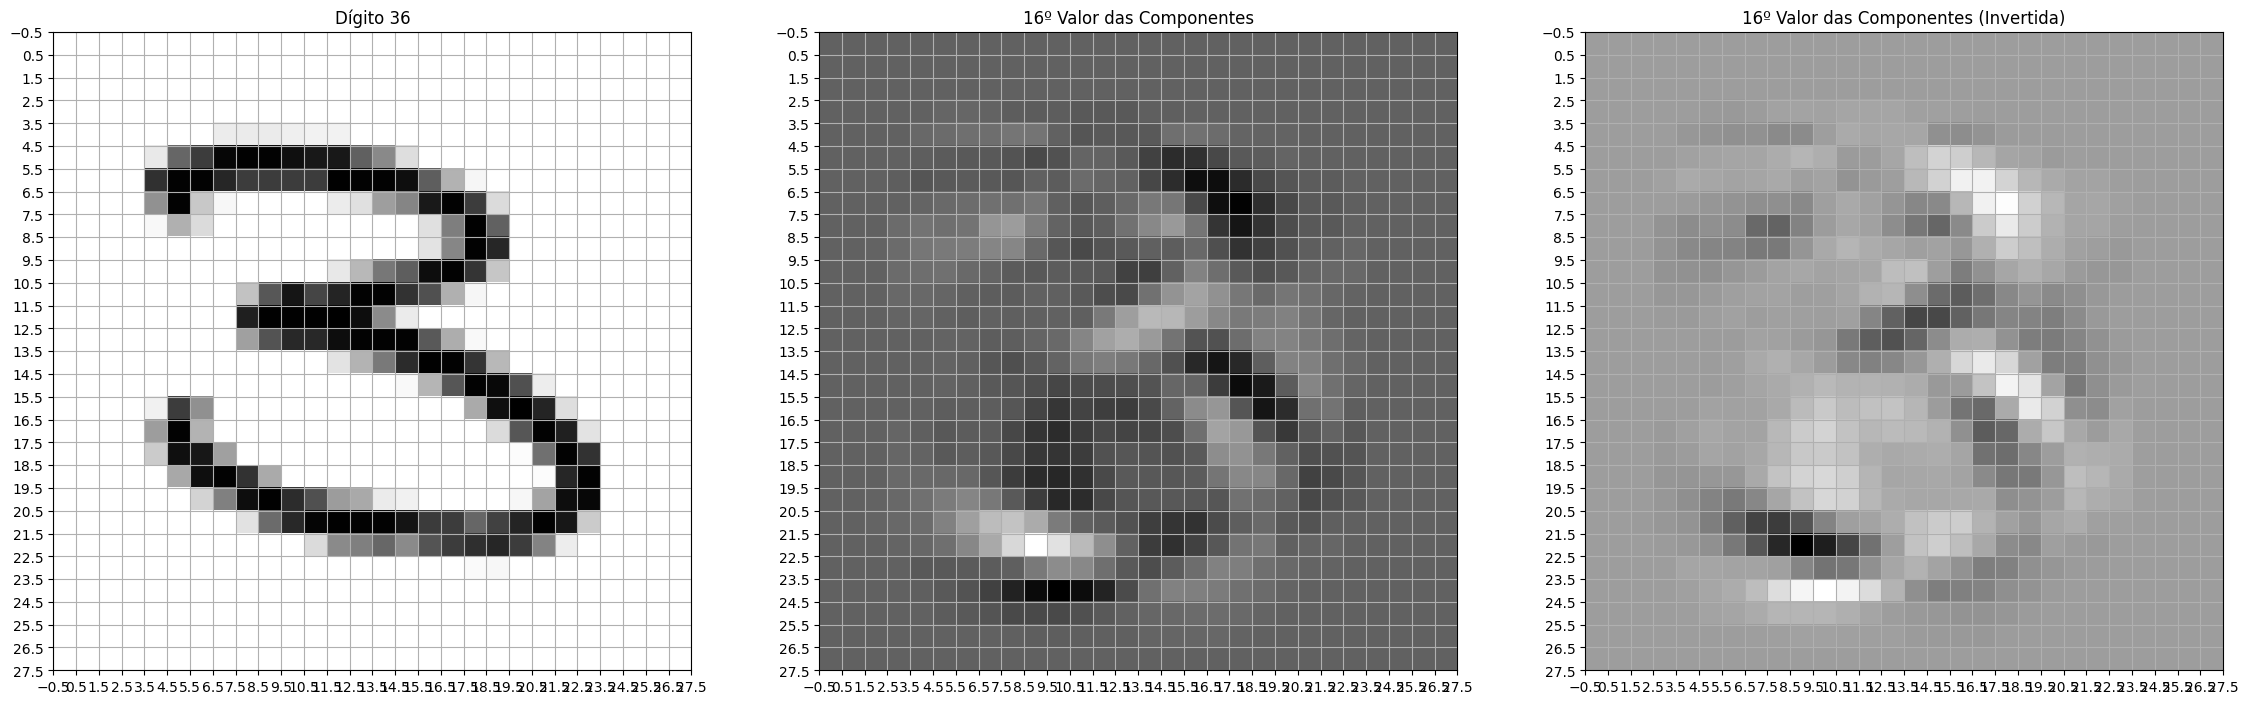

In [4]:
plt.figure(figsize=(28,28))
plt.subplot(131)
plt.imshow(255-X2_dig3[:,35].reshape((28, 28)), interpolation='none',cmap='gray') 
plt.title('Dígito 36')
plt.xticks(np.arange(-0.5, 27.7))
plt.yticks(np.arange(-0.5, 27.7))
plt.grid()
plt.subplot(132)

plt.imshow(V[:,15].reshape((28, 28)), interpolation='none',cmap='gray') 
plt.title('16º Valor das Componentes')
plt.xticks(np.arange(-0.5, 27.7))
plt.yticks(np.arange(-0.5, 27.7))
plt.grid()
plt.subplot(133)

plt.imshow(255-V[:,15].reshape((28, 28)), interpolation='none',cmap='gray') 
plt.title('16º Valor das Componentes (Invertida)')
plt.xticks(np.arange(-0.5, 27.7))
plt.yticks(np.arange(-0.5, 27.7))
plt.grid()
plt.show()

## b) ii)382

In [5]:
np.sum(u>(10e-10))

382

## c) i)

In [6]:
x1 = X2_dig3[:, 157]
x2 = X2_dig3[:, 228]
x3 = X2_dig3[:, 233]
x4 = X2_dig3[:, 276]

print('i)  O produto interno entre os vetores x1 e x2 é 2489706:', np.inner(x1, x2)) # V
print('ii) O produto interno entre os vetores x3 e x4 é 2481497:', np.inner(x3, x4)) # F

i)  O produto interno entre os vetores x1 e x2 é 2489706: 2489706.0
ii) O produto interno entre os vetores x3 e x4 é 2481497: 3493817.0


## d) iii)

In [7]:
print('i)  A dimensão da matriz é 784 × 784:', Cx.shape)
print('ii) O determinante da matriz de covariância é igual a 0:', np.linalg.det(Cx))

i)  A dimensão da matriz é 784 × 784: (784, 784)
ii) O determinante da matriz de covariância é igual a 0: 0.0


## e) iii) 20.0

In [8]:
# 156º dígito:
dig155 = X2_dig3[:, 155]

# Guardar só as referidas componentes na matriz de transformação W
un = u/np.sum(u)
uc = np.cumsum(un)
W  = V[:, :np.sum(uc<=.43)]

dig155p = np.dot(W.T,dig155)    # Dados projetados
dig155r = np.dot(W, dig155p)    # Dados reconstruidos 
print('Erro Absoluto Médio:', np.round(np.mean(np.abs(dig155r - dig155))))

Erro Absoluto Médio: 20.0


## f) iv)

In [9]:
num_zeros = np.sum(np.diag(Cx)==0)
print('Número de píxeis iguais a zero:', num_zeros)

Número de píxeis iguais a zero: 295


## g) i)

In [10]:
print('i)  Existem 295 dimensões dos dados que não variam:' ,np.sum(np.diag(Cx)==0))
print('ii) O coeficiente de correlação entre a dimensão 187 e 686 é 0.13:', np.round(np.corrcoef(X2_dig3)[186, 685], 2))

i)  Existem 295 dimensões dos dados que não variam: 295
ii) O coeficiente de correlação entre a dimensão 187 e 686 é 0.13: 0.0


C:\Users\dadum\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\dadum\AppData\Roaming\Python\Python311\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


## h) ii)757

In [11]:
# 122º dígito:
dig122 = X2_dig3[:, 121]

# Guardar só as referidas componentes na matriz de transformação W
W = V[:, :51]
# print(W.shape)

dig122p = np.dot(W.T,dig122)     # Dados projetados
dig122r = np.dot(W,dig122p)      # Dados reconstruidos 

print('Erro Quadrático Médio:', np.round(np.mean((dig122-dig122r)**2)))

Erro Quadrático Médio: 757.0


## i) iii)

In [12]:
pca = PCA(n_components=.70, svd_solver='full').fit(X2_dig3.T)
print('Valores próprios para 70%:', pca.n_components_)

Valores próprios para 70%: 20


## j) ii)

In [13]:
print('i)  A norma do vetor de média dos dados é 853:', np.round(np.linalg.norm(np.mean(X2_dig3, axis=1))))
print('ii) O desvio padrao da dimensão 220 dos dados é 7:', np.round(np.std(X2_dig3,axis=1))[219])

i)  A norma do vetor de média dos dados é 853: 1706.0
ii) O desvio padrao da dimensão 220 dos dados é 7: 7.0


In [14]:
QuestDic=pickle.load(open('A45977_Ficha3_Respostas.p','rb'))
# Pergunta 1
print('1a):', np.where(QuestDic['Q001'][0,:] == 1)[0][0] + 1)
print('1b):', np.where(QuestDic['Q001'][1,:] == 1)[0][0] + 1)
print('1c):', np.where(QuestDic['Q001'][2,:] == 1)[0][0] + 1)
print('1d):', np.where(QuestDic['Q001'][3,:] == 1)[0][0] + 1)
print('1e):', np.where(QuestDic['Q001'][4,:] == 1)[0][0] + 1)
print('1f):', np.where(QuestDic['Q001'][5,:] == 1)[0][0] + 1)
print('1g):', np.where(QuestDic['Q001'][6,:] == 1)[0][0] + 1)
print('1h):', np.where(QuestDic['Q001'][7,:] == 1)[0][0] + 1)
print('1i):', np.where(QuestDic['Q001'][8,:] == 1)[0][0] + 1)
print('1j):', np.where(QuestDic['Q001'][9,:] == 1)[0][0] + 1)

1a): 1
1b): 2
1c): 1
1d): 3
1e): 3
1f): 4
1g): 1
1h): 2
1i): 3
1j): 2
